# Задача 7
Решить систему уравнений хищник-жертва

$$\begin{cases}
   \dot{x(t)} = ax - bxy \\
   \dot{y(t)} = cxy - dy
 \end{cases}$$
 

методом Рунге-Кутты второго порядка точности при $a = 10$, $b = 2$, $c = 2$, $d = 10$. Нарисовать фазовую траекторию. 

## Решение 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

Задам коэффициенты, начальные данные и интервал по $t$:

In [2]:
a = 10
b = 2
c = 2
d = 10

t_start = 0
t_end = 10

x_start = 5
y_start = 10

Задам правые части для обоих уравнений системы. (Коэффициенты спрячу туда).

In [3]:
class F:
    def __init__(self, a=0, b=0, c=0, d=0):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
    
    def f_1(self, t, x, y):
        return self.a*x - self.b*x*y
    
    def f_2(self, t, x, y):
        return self.c*x*y - self.d*y

### Метод Рунге-Кутты 2-го порядка

$$x_{n+1} = x_n + h[(1 - \alpha)f_1(t_n, x_n, y_n) + \\ + \alpha f_1(t_n + \frac{h}{2\alpha}, x_n + \frac{h}{2\alpha}f_1(t_n, x_n, y_n), y_n + \frac{h}{2\alpha}f_2(t_n, x_n, y_n))]$$



$$y_{n+1} = y_n + h[(1 - \alpha)f_2(t_n, x_n, y_n) + \\ + \alpha f_2(t_n + \frac{h}{2\alpha}, x_n + \frac{h}{2\alpha}f_1(t_n, x_n, y_n), y_n + \frac{h}{2\alpha}f_2(t_n, x_n, y_n))]$$

Точность: второй порядок по шагу сетки $h$. 

Для минимизации численного коэффициента при $h^2$ в остаточном члене в общем случае следует использовать $\alpha = 3/4$.

Возьму равномерный шаг сетки. `N` - число интервалов разбиения отрезка по $t$.

In [4]:
def rk2_solve(f_1, f_2, t_start, t_end, x_start, y_start, N, alpha=0.75):
    x_s = []
    y_s = []
    t_s = []
    
    h = (t_end - t_start)/N

    t_s.append(t_start)
    x_s.append(x_start)
    y_s.append(y_start)
    
    x_shift = 0
    y_shift = 0
    t_shift = 0
    
    for i in range(1, N+1):
        t_s.append(t_start + i*h)
        
        f_1i = f_1(t=t_s[i-1], x=x_s[i-1], y=y_s[i-1])
        f_2i = f_2(t=t_s[i-1], x=x_s[i-1], y=y_s[i-1])
        
        x_shift = x_s[i-1] + (h/(2*alpha))*f_1i
        y_shift = y_s[i-1] + (h/(2*alpha))*f_2i
        t_shift = t_s[i-1] + (h/(2*alpha))
   
        x_s.append(x_s[i-1] + h*((1-alpha)*f_1i + alpha*f_1(t=t_shift, x=x_shift, y=y_shift)))
        y_s.append(y_s[i-1] + h*((1-alpha)*f_2i + alpha*f_2(t=t_shift, x=x_shift, y=y_shift)))

    return t_s, x_s, y_s

Проведу вычисления

In [5]:
N = 1000
func = F(a, b, c, d)

x_start = 5.1
y_start = 4.9

res_t, res_x, res_y = rk2_solve(func.f_1, func.f_2, t_start, t_end, x_start, y_start, N)

### Графики 

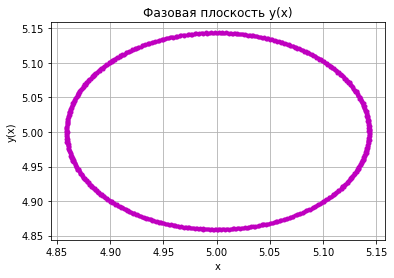

In [6]:
plt.plot(res_x, res_y, 'm.')
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Фазовая плоскость y(x)')
plt.show()

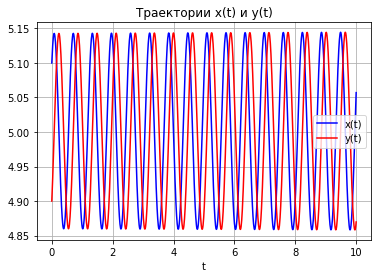

In [7]:
plt.plot(res_t, res_x, 'b', label='x(t)')
plt.plot(res_t, res_y, 'r', label='y(t)')
plt.grid()
plt.xlabel('t')
plt.title('Траектории x(t) и y(t)')
plt.legend()
plt.show()

### Поиск стационарного решения

"Баланс" между хищниками и жертвами будет тогда, когда их количество не будет изменяться со временем. Это стационарное решение. Чтобы его найти, приравниваю производные по времени $\dot{x(t)}$, $\dot{y(t)}$ к нулю:


$$\begin{cases}
   \dot{x(t)} = ax - bxy = 0 \\
   \dot{y(t)} = cxy - dy = 0
 \end{cases}$$
 
Получаю стационарные решения: 

$$\begin{cases}
   x_{st}(t) = \frac{d}{c} \\
   y_{st}(t) = \frac{a}{b}
 \end{cases}$$
 
Следовательно, для получения стационарных решений нужно взять начальные данные `x_start`, `y_start`, равные значениям стационарных решений.


In [8]:
x_st = d/c
y_st = a/b

x_start = x_st
y_start = y_st

x_st, y_st

(5.0, 5.0)

In [9]:
N = 200
func = F(a, b, c, d)

res_t, res_x, res_y = rk2_solve(func.f_1, func.f_2, t_start, t_end, x_start, y_start, N)

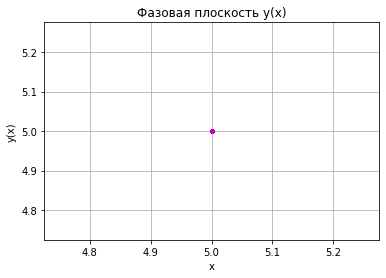

In [10]:
plt.plot(res_x, res_y, 'm.')
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Фазовая плоскость y(x)')
plt.show()

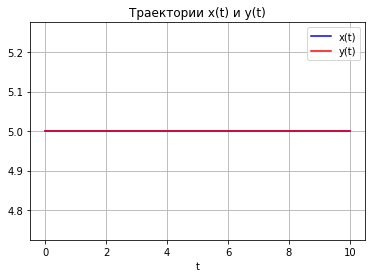

In [11]:
plt.plot(res_t, res_x, 'b', label='x(t)')
plt.plot(res_t, res_y, 'r', label='y(t)')
plt.grid()
plt.xlabel('t')
plt.title('Траектории x(t) и y(t)')
plt.legend()
plt.show()

### Почему нужно большое N при решении: 

Для сходимости итерационного процесса нужно, чтобы все собственные числа матрицы $h\hat J$ были по модулю меньше единицы. ($h$ - шаг сетки, $\hat J$ - матрица Якоби). 

$$h \hat J = 
\begin{pmatrix}
h(a - by) & -hbx \\
hcy & h(cx - d) 
\end{pmatrix}$$

При $x = 0, \; y = 0$ (для оценки) собственные значения: 

$$\lambda_{1, 2} = \pm h \cdot 100$$

Тогда для сходимости нужно: 
$$h < 0.01$$

Посмотрю величину шагов для различных N:

In [12]:
N_s = [i*100 for i in range(1, 21)]
h_s = [(t_end - t_start)/n for n in N_s]

In [13]:
for i in range(len(N_s)):
    print(N_s[i],':', h_s[i])

100 : 0.1
200 : 0.05
300 : 0.03333333333333333
400 : 0.025
500 : 0.02
600 : 0.016666666666666666
700 : 0.014285714285714285
800 : 0.0125
900 : 0.011111111111111112
1000 : 0.01
1100 : 0.00909090909090909
1200 : 0.008333333333333333
1300 : 0.007692307692307693
1400 : 0.007142857142857143
1500 : 0.006666666666666667
1600 : 0.00625
1700 : 0.0058823529411764705
1800 : 0.005555555555555556
1900 : 0.005263157894736842
2000 : 0.005


То есть $N = 300$ еще не обеспечивает необходимую величину шага:

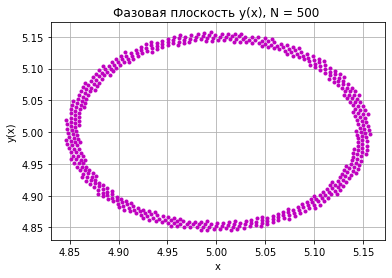

In [16]:
N = 500
func = F(a, b, c, d)

x_start = 5.1
y_start = 4.9

res_t, res_x, res_y = rk2_solve(func.f_1, func.f_2, t_start, t_end, x_start, y_start, N)

plt.plot(res_x, res_y, 'm.')
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Фазовая плоскость y(x), N = 500 ')
plt.show()

A $N = 1000$ уже обеспечивает шаг $h = 0.01$ (При заданной величине интервала $t \in [0, 10]$):

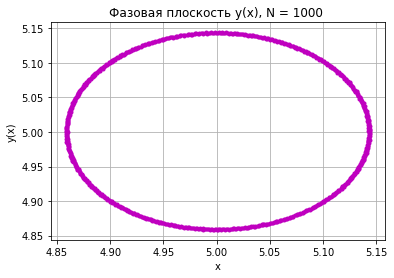

In [18]:
N = 1000
func = F(a, b, c, d)

x_start = 5.1
y_start = 4.9

res_t, res_x, res_y = rk2_solve(func.f_1, func.f_2, t_start, t_end, x_start, y_start, N)

plt.plot(res_x, res_y, 'm.')
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Фазовая плоскость y(x), N = 1000 ')
plt.show()